In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## This week’s topic: Happiness

But March 20th also marked another important day, the [International Day of Happiness](https://en.wikipedia.org/wiki/International_Day_of_Happiness) (aka “World Happiness Day”). The idea is that people should take steps to improve their satisfaction and happiness — and to spread such satisfaction and happiness to others around the world, as well.

The creator of the International Day of Happiness, Jayme Illien, talks about “[Happiness economics](https://en.wikipedia.org/wiki/Happiness_economics),” in which we measure the success of government policies not by gross national product (GNP) or gross domestic product (GDP), but rather by people’s aggregate happiness. That raises the question of how you measure people’s happiness, and there’s definitely an element of utopianism here — but I’m not sure if it’s such a bad idea to be optimizing for happiness, rather than material wealth.

It turns out that some researchers have been trying to measure happiness. Moreover, on World Happiness Day, those reearchers release an annual report listing the happiest (and unhappiest) countries in the world. The report for 2023 includes data taken through 2022, and compares countries’ happiness levels, along with a number of other factors.

### Data

The full world happiness report is at

https://worldhappiness.report/ed/2023/

and the specific data that we’ll be looking at comes from the “data for table 2.1,” at:

https://happiness-report.s3.amazonaws.com/2023/DataForTable2.1WHR2023.xls

Note that this is not the same as the “data for figure 2.1.” I can assure you that my happiness level would have been a bit higher if they hadn’t used figure 2.1 and table 2.1 in the same document, and then labeled the only data files in that way!

### Tasks

Here are the questions we’re going to ask:

1. Get the data file DataForTable2.1WHR2023, and turn it into a data frame.
1. The main measure in the World Happiness Report is known as "life ladder," where people are asked where they currently are, on a scale from 1 to 10 — where 10 is the happiest possible life. According to this measure in 2022, which 10 countries are happiest?
1. The WHR actually calculates happiness by averaging the results from the three most recent years (i.e., 2020, 2021, and 2022). Given that measure, what are the 10 happiest countries in the world?
1. Calculate how countries' ranks shifted between last year's survey and this year's survey. Which countries had the greatest positive change, and which had the greatest negative change?
1. Show the change (positive or negative) in this year's 10 happiest countries, vs. last year's survey.
1. What countries, if any, are in top half of 2022 happiness score and in the bottom half of 2022's "freedom to make life choices"?

The learning goals for this week include grouping, selecting particular rows, and working with indexes.

#### 1. Get the data file DataForTable2.1WHR2023, and turn it into a data frame.

In [6]:
url = "https://happiness-report.s3.amazonaws.com/2023/DataForTable2.1WHR2023.xls"
df = pd.read_excel(url)

In [4]:
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


In [5]:
df = pd.read_excel(
    url, usecols=["Country name", "year", "Life Ladder", "Freedom to make life choices"]
)
df

,Country name,year,Life Ladder,Freedom to make life choices
0,Afghanistan,2008,3.723590,0.718114
1,Afghanistan,2009,4.401778,0.678896
2,Afghanistan,2010,4.758381,0.600127
3,Afghanistan,2011,3.831719,0.495901
4,Afghanistan,2012,3.782938,0.530935
...,...,...,...,...
2194,Zimbabwe,2018,3.616480,0.762675
2195,Zimbabwe,2019,2.693523,0.631908
2196,Zimbabwe,2020,3.159802,0.643303
2197,Zimbabwe,2021,3.154578,0.667636


#### 2. The main measure in the World Happiness Report is known as "life ladder," where people are asked where they currently are, on a scale from 1 to 10 — where 10 is the happiest possible life. According to this measure in 2022, which 10 countries are happiest?


<Axes: xlabel='Country name'>

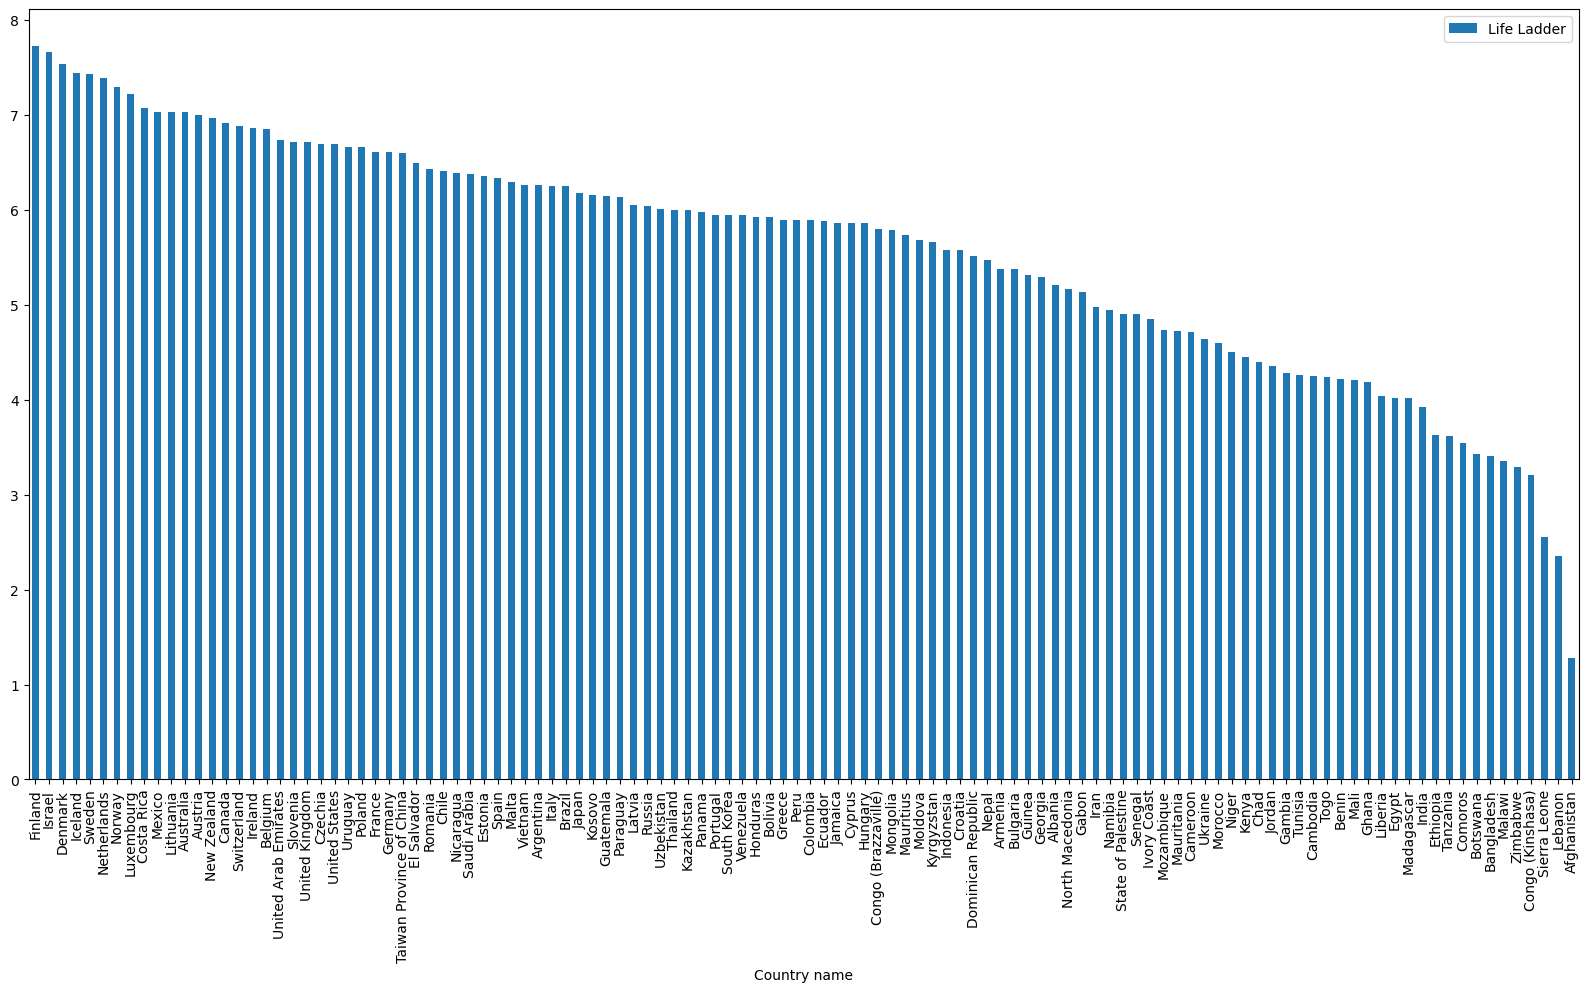

In [12]:
df[df.year == 2022][["Country name", "Life Ladder"]].sort_values(
    "Life Ladder", ascending=False
).plot.bar(x="Country name", y="Life Ladder", figsize=(20, 10))

In [10]:
df[df.year == 2022][["Country name", "Life Ladder"]].sort_values("Life Ladder", ascending=False).head(10)

,Country name,Life Ladder
637,Finland,7.728998
925,Israel,7.662397
521,Denmark,7.544965
830,Iceland,7.448794
1865,Sweden,7.431214
1395,Netherlands,7.389636
1484,Norway,7.294604
1166,Luxembourg,7.227935
459,Costa Rica,7.076658
1277,Mexico,7.038369


#### 3. The WHR actually calculates happiness by averaging the results from the three most recent years (i.e., 2020, 2021, and 2022). Given that measure, what are the 10 happiest countries in the world?

In [14]:
df[df.year.isin([2022, 2021, 2020])].groupby("Country name")["Life Ladder"].mean().sort_values(ascending=False).head(10)

Country name
Finland        7.804242
Denmark        7.586114
Iceland        7.529636
Israel         7.478285
Netherlands    7.402745
Sweden         7.394945
Norway         7.315403
Switzerland    7.239984
Luxembourg     7.227935
New Zealand    7.123023
Name: Life Ladder, dtype: float64

In [15]:
df[df.year.isin([2022, 2021, 2020])].groupby("Country name")[
    "Life Ladder"
].agg("mean").sort_values(ascending=False).head(10)

Country name
Finland        7.804242
Denmark        7.586114
Iceland        7.529636
Israel         7.478285
Netherlands    7.402745
Sweden         7.394945
Norway         7.315403
Switzerland    7.239984
Luxembourg     7.227935
New Zealand    7.123023
Name: Life Ladder, dtype: float64

I also found some articles asking how Finland is consistently ranked as the happiest country in the world. Here are two good ones:

https://bigthink.com/neuropsych/happiest-country-in-the-world/

https://www.washingtonpost.com/travel/2022/03/31/finland-happiest-country/

In any event, we now have a variable, happiness_2023, containing each country and its 2023 happiness score.

#### 4. Calculate how countries' ranks shifted between last year's survey and this year's survey. Which countries had the greatest positive change, and which had the greatest negative change?

In [87]:
happiness_2022 = (
    df[df.year.isin([2022, 2021, 2020])]
    .groupby("Country name")["Life Ladder"]
    .agg(LifeLadder="mean")
    .sort_values("LifeLadder", ascending=False)
)
happiness_2022["rank"] = np.arange(1, len(happiness_2022) + 1)

happiness_2021 = (
    df[df.year.isin([2021, 2020, 2019])]
    .groupby("Country name")["Life Ladder"]
    .agg(LifeLadder="mean")
    .sort_values("LifeLadder", ascending=False)
)
happiness_2021["rank"] = np.arange(1, len(happiness_2021) + 1)

In [88]:
happiness = pd.merge(happiness_2022, happiness_2021, on="Country name", suffixes=("_2022", "_2021"))
happiness

,LifeLadder_2022,rank_2022,LifeLadder_2021,rank_2021
Country name,,,,
Finland,7.804242,1,7.821359,1
Denmark,7.586114,2,7.635461,2
Iceland,7.529636,3,7.557540,3
Israel,7.478285,4,7.368079,8
Netherlands,7.402745,5,7.414623,5
...,...,...,...,...
Botswana,3.435275,132,3.471085,141
Zimbabwe,3.203533,134,3.002635,143
Sierra Leone,3.137362,135,3.580838,139


In [89]:
happiness["delta_LifeLadder"] = happiness["LifeLadder_2021"] - happiness["LifeLadder_2022"]
happiness["delta_rank"] = happiness["rank_2021"] - happiness["rank_2022"]
happiness

,LifeLadder_2022,rank_2022,LifeLadder_2021,rank_2021,delta_LifeLadder,delta_rank
Country name,,,,,,
Finland,7.804242,1,7.821359,1,0.017117,0
Denmark,7.586114,2,7.635461,2,0.049346,0
Iceland,7.529636,3,7.557540,3,0.027903,0
Israel,7.478285,4,7.368079,8,-0.110206,4
Netherlands,7.402745,5,7.414623,5,0.011878,0
...,...,...,...,...,...,...
Botswana,3.435275,132,3.471085,141,0.035810,9
Zimbabwe,3.203533,134,3.002635,143,-0.200899,9
Sierra Leone,3.137362,135,3.580838,139,0.443476,4


In [90]:
happiness.sort_values("delta_LifeLadder", ascending=False).head(10)

,LifeLadder_2022,rank_2022,LifeLadder_2021,rank_2021,delta_LifeLadder,delta_rank
Country name,,,,,,
Liberia,4.042260,125,5.121461,95,1.079201,-30
Comoros,3.545204,130,4.608616,116,1.063413,-14
Gambia,4.279441,118,5.163627,92,0.884186,-26
Bangladesh,4.270279,119,4.839174,110,0.568895,-9
Lebanon,2.388330,136,2.945594,144,0.557264,8
Afghanistan,1.858653,137,2.405563,145,0.546910,8
Niger,4.501331,109,5.003544,102,0.502213,-7
Bahrain,6.173176,42,6.635594,21,0.462418,-21
Sierra Leone,3.137362,135,3.580838,139,0.443476,4


In [91]:
happiness.sort_values("delta_rank", ascending=True).head(10)

,LifeLadder_2022,rank_2022,LifeLadder_2021,rank_2021,delta_LifeLadder,delta_rank
Country name,,,,,,
Liberia,4.042260,125,5.121461,95,1.079201,-30
Gambia,4.279441,118,5.163627,92,0.884186,-26
Bahrain,6.173176,42,6.635594,21,0.462418,-21
Comoros,3.545204,130,4.608616,116,1.063413,-14
Bangladesh,4.270279,119,4.839174,110,0.568895,-9
Philippines,5.522321,76,5.770796,67,0.248475,-9
Brazil,6.125584,49,6.190273,41,0.064690,-8
Jamaica,5.702971,68,5.849321,61,0.146350,-7
Mauritius,5.901640,59,6.068528,52,0.166888,-7


In [92]:
happiness.sort_values("delta_LifeLadder", ascending=True).head(10)

,LifeLadder_2022,rank_2022,LifeLadder_2021,rank_2021,delta_LifeLadder,delta_rank
Country name,,,,,,
Mauritania,4.723869,103,4.152619,132,-0.571249,29
State of Palestine,4.907760,100,4.482537,121,-0.425223,21
Lithuania,6.764510,20,6.440016,34,-0.324493,14
Venezuela,5.210125,88,4.920729,106,-0.289396,18
Vietnam,5.756367,65,5.490014,77,-0.266352,12
Nigeria,4.991107,95,4.749566,111,-0.241541,16
India,3.903979,128,3.676963,138,-0.227015,10
China,5.816965,64,5.592683,72,-0.224281,8
Zambia,3.960074,127,3.742315,136,-0.217759,9


In [93]:
happiness.sort_values("delta_rank", ascending=False).head(10)

,LifeLadder_2022,rank_2022,LifeLadder_2021,rank_2021,delta_LifeLadder,delta_rank
Country name,,,,,,
Mauritania,4.723869,103,4.152619,132,-0.571249,29
State of Palestine,4.907760,100,4.482537,121,-0.425223,21
Venezuela,5.210125,88,4.920729,106,-0.289396,18
Namibia,4.630393,105,4.459343,122,-0.171051,17
Nigeria,4.991107,95,4.749566,111,-0.241541,16
Chad,4.396646,114,4.250799,130,-0.145847,16
Guinea,5.078067,91,4.894797,107,-0.183270,16
Georgia,5.109057,89,4.975417,103,-0.133640,14
Sri Lanka,4.440968,112,4.365078,126,-0.075890,14


In [94]:
happiness.query("delta_rank == 0")

,LifeLadder_2022,rank_2022,LifeLadder_2021,rank_2021,delta_LifeLadder,delta_rank
Country name,,,,,,
Finland,7.804242,1,7.821359,1,0.017117,0
Denmark,7.586114,2,7.635461,2,0.049346,0
Iceland,7.529636,3,7.557540,3,0.027903,0
Netherlands,7.402745,5,7.414623,5,0.011878,0
New Zealand,7.123023,10,7.199752,10,0.076729,0
Austria,7.097376,11,7.162830,11,0.065455,0
Australia,7.094554,12,7.160987,12,0.066433,0
Czechia,6.844889,18,6.919794,18,0.074906,0
Costa Rica,6.607860,24,6.581513,24,-0.026347,0


#### 5. Show the change (positive or negative) in this year's 10 happiest countries, vs. last year's survey.

In [95]:
happiness.sort_values("LifeLadder_2022", ascending=False).head(10)

,LifeLadder_2022,rank_2022,LifeLadder_2021,rank_2021,delta_LifeLadder,delta_rank
Country name,,,,,,
Finland,7.804242,1,7.821359,1,0.017117,0
Denmark,7.586114,2,7.635461,2,0.049346,0
Iceland,7.529636,3,7.557540,3,0.027903,0
Israel,7.478285,4,7.368079,8,-0.110206,4
Netherlands,7.402745,5,7.414623,5,0.011878,0
Sweden,7.394945,6,7.383905,7,-0.011041,1
Norway,7.315403,7,7.364582,9,0.049178,2
Switzerland,7.239984,8,7.510110,4,0.270126,-4
Luxembourg,7.227935,9,7.404016,6,0.176081,-3


#### 6. What countries, if any, are in top half of 2022 happiness score and in the bottom half of 2022's "freedom to make life choices"?

In [78]:
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,rank
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,1
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,2
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,3
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,4
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726,2195
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354,2196
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736,2197
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682,2198


In [83]:
avg_freedom = df.loc[df.year == 2022, "Freedom to make life choices"].mean()

In [84]:
not_free_choices = df.loc[(df['Freedom to make life choices'] 
        < avg_freedom) & 
       (df['year'] == 2022), 
       'Country name']

In [85]:
not_free_choices

13              Afghanistan
75                  Armenia
194                   Benin
241                Botswana
272                Bulgaria
326                Cameroon
363                    Chad
420                 Comoros
433     Congo (Brazzaville)
442        Congo (Kinshasa)
474                 Croatia
490                  Cyprus
559                 Ecuador
576                   Egypt
622                Ethiopia
666                   Gabon
670                  Gambia
721                   Ghana
737                  Greece
764                  Guinea
820                 Hungary
879                    Iran
925                  Israel
942                   Italy
953             Ivory Coast
979                   Japan
996                  Jordan
1030                  Kenya
1117                Lebanon
1131                Liberia
1154              Lithuania
1178             Madagascar
1192                 Malawi
1251             Mauritania
1309               Mongolia
1362                

In [96]:
happiness_2022.loc[happiness_2022["rank"] < happiness_2022["rank"].mean()]

,LifeLadder,rank
Country name,,
Finland,7.804242,1
Denmark,7.586114,2
Iceland,7.529636,3
Israel,7.478285,4
Netherlands,7.402745,5
...,...,...
China,5.816965,64
Vietnam,5.756367,65
Paraguay,5.738132,66


In [98]:
happiness_2022.loc[
    happiness_2022["rank"] < happiness_2022["rank"].mean()
].index.intersection(not_free_choices)

Index(['Israel', 'United States', 'Lithuania', 'Spain', 'Italy', 'Cyprus',
       'Japan', 'Croatia', 'Hungary', 'South Korea', 'Greece', 'Mongolia'],
      dtype='object', name='Country name')

#### Bonus

<Axes: xlabel='Life Ladder', ylabel='Log GDP per capita'>

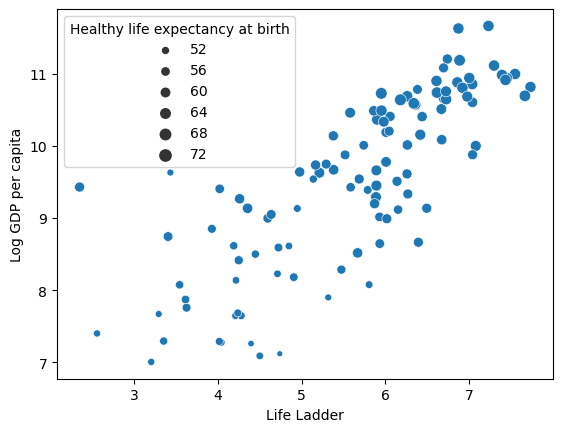

In [106]:
sns.scatterplot(df.query("year == 2022"), x="Life Ladder", y="Log GDP per capita", size="Healthy life expectancy at birth")